<a href="https://colab.research.google.com/github/alberzenon/TecMilenio/blob/main/Iris_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=525f2cfd87a5af65465129bc88572cdd4c53b80dfb93ed41ef01e86dcba00b28
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
datos = iris.data
etiquetas = iris.target

In [ ]:
etiquetas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, datos)

X_train, X_test, y_train, y_test = train_test_split(data, etiquetas, test_size=0.33, random_state=42)

In [ ]:
X_test.shape

(50, 4)

In [ ]:
from minisom import MiniSom
som = MiniSom(6,6,4,sigma=1,learning_rate=0.5,neighborhood_function="gaussian") 

In [ ]:
som.train(X_train, 3000)

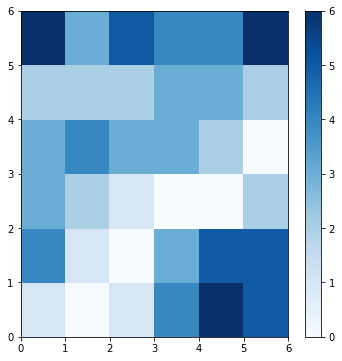

In [ ]:
plt.figure(figsize=(6, 6))
frequencies = som.activation_response(X_train)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

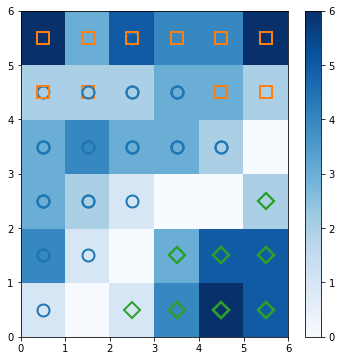

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 6))

plt.pcolor(frequencies.T, cmap='Blues')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X_train):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[y_train[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[y_train[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

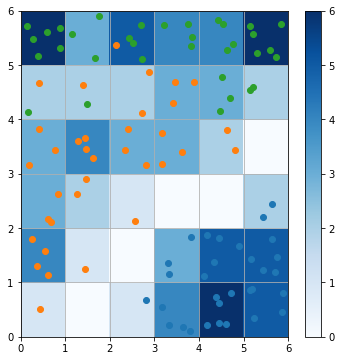

In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in X_train])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(6, 6))
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()

for c in np.unique(y_train):
    idx_target = y_train==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, )

plt.grid()
plt.show()

In [ ]:
som.pca_weights_init(X_train)
som.train_random(X_train, 5000, verbose=False)

In [ ]:
class_assignments = som.labels_map(X_train, y_train)

In [ ]:
class_assignments

defaultdict(list,
            {(0, 0): Counter({1: 4}),
             (0, 1): Counter({1: 1}),
             (0, 2): Counter({1: 1}),
             (0, 3): Counter({1: 3}),
             (0, 4): Counter({1: 1, 2: 1}),
             (0, 5): Counter({2: 6}),
             (1, 1): Counter({1: 2}),
             (1, 2): Counter({1: 3}),
             (1, 3): Counter({1: 2}),
             (1, 4): Counter({2: 1}),
             (1, 5): Counter({1: 1, 2: 3}),
             (2, 0): Counter({0: 1}),
             (2, 2): Counter({1: 2}),
             (2, 3): Counter({1: 3}),
             (2, 4): Counter({2: 4}),
             (2, 5): Counter({2: 3}),
             (3, 0): Counter({0: 6}),
             (3, 1): Counter({0: 2}),
             (3, 3): Counter({1: 2}),
             (3, 4): Counter({2: 3}),
             (3, 5): Counter({2: 4}),
             (4, 0): Counter({0: 4}),
             (4, 1): Counter({0: 9}),
             (4, 3): Counter({1: 7}),
             (4, 4): Counter({1: 3, 2: 1}),
             (

In [ ]:
class_assignments.values()

dict_values([Counter({1: 7}), Counter({2: 6}), Counter({1: 3, 2: 1}), Counter({0: 9}), Counter({1: 1}), Counter({0: 4}), Counter({0: 2}), Counter({1: 3}), Counter({2: 1}), Counter({0: 6}), Counter({0: 2}), Counter({1: 3}), Counter({2: 3}), Counter({1: 2}), Counter({2: 4}), Counter({0: 3}), Counter({2: 2}), Counter({1: 2}), Counter({0: 4}), Counter({1: 4}), Counter({2: 3}), Counter({1: 3}), Counter({2: 4}), Counter({1: 2}), Counter({2: 3, 1: 1}), Counter({1: 1, 2: 1}), Counter({2: 4}), Counter({2: 2}), Counter({1: 2}), Counter({0: 1}), Counter({1: 1})])

In [ ]:
def classify(som, data, class_assignments):
    winmap = class_assignments
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, classify(som, X_test, class_assignments)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      1.00      0.94        15
           2       1.00      0.88      0.93        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

